In [53]:
import numpy as np
import pandas as pd
from pandas import DataFrame as df

def sigmoid (x) :
    return (1 / (1 +np.exp(-x)) )

# train set
np.random.seed(1234)
X1 = np.random.normal(size=1000)
X2 = np.random.normal(size=1000)
Z = np.random.normal(size=1000)
a1 = np.array([2,2])
a2 = np.array([3,-3])
X = np.c_[X1, X2].T
Y = sigmoid(np.dot(a1.T, X)) + np.dot(a2.T, X)**2 + 0.3*Z
train = df({'X1' : X1, 'X2' : X2, 'Y' : Y})

# test set
np.random.seed(5678)
X1 = np.random.normal(size=1000)
X2 = np.random.normal(size=1000)
Z = np.random.normal(size=1000)
a1 = np.array([2,2])
a2 = np.array([3,-3])
X = np.c_[X1, X2].T
Y = sigmoid(np.dot(a1.T, X)) + np.dot(a2.T, X)**2 + 0.3*Z
test = df({'X1' : X1, 'X2' : X2, 'Y' : Y})

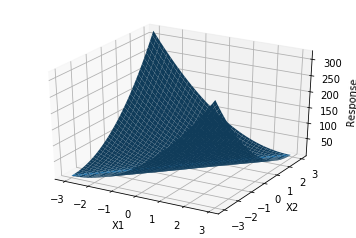

In [137]:
### Plot the surface of response 
from matplotlib import cm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

X1 = X2 = np.arange(-3.0, 3.0, 0.05)
a1 = np.array([2,2])
a2 = np.array([3,-3])

xss, yss = np.meshgrid(X1, X2)

def fun(x, y) :
    a1 = np.array([2,2])
    a2 = np.array([3,-3])
    X = np.c_[x, y].T
    return sigmoid(np.dot(a1.T, X)) + np.dot(a2.T, X)**2

zs = np.array([fun(x,y) for x,y in zip(np.ravel(xss), np.ravel(yss))])
Z = zs.reshape(120,120)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(xss, yss, Z)
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Response')

plt.show()

In [189]:
### Neural Network analysis usging scikit learn package
import pandas as pd
import numpy as np
from sklearn import model_selection
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor

x_train, x_test, y_train, y_test = train[['X1','X2']], test[['X1','X2']], train['Y'], test['Y']

#estimator = MLPRegressor()
train_error = []
test_error = []

for i in range(1, 11) :
    print('Hidden node : ',i,)
    estimator = MLPRegressor(hidden_layer_sizes=(i,), max_iter=100000)
    estimator.fit(x_train, y_train)
    # train error
    y_predict = estimator.predict(x_train)
    train_error_tmp = sum( (y_predict - y_train)**2/len(y_train))
    print('train error : ', train_error_tmp)
    train_error.append(train_error_tmp)
    # test error    
    y_predict_t = estimator.predict(x_test)
    test_error_tmp = sum( (y_predict_t - y_test)**2/len(y_test))
    print('test error : ', test_error_tmp)
    test_error.append(test_error_tmp)

Hidden node :  1
train error :  568.950498636
test error :  742.695276337
Hidden node :  2
train error :  17.4252367932
test error :  24.4828230244
Hidden node :  3
train error :  17.4360406407
test error :  24.7663533674
Hidden node :  4
train error :  11.8764422662
test error :  16.4057344354
Hidden node :  5
train error :  2.87987151293
test error :  4.97090862798
Hidden node :  6
train error :  3.29895433036
test error :  5.92984831171
Hidden node :  7
train error :  2.36465161425
test error :  4.58815958339
Hidden node :  8
train error :  1.75917020037
test error :  3.93927733146
Hidden node :  9
train error :  3.15389472835
test error :  5.37746526653
Hidden node :  10
train error :  3.6071913646
test error :  6.29519127091


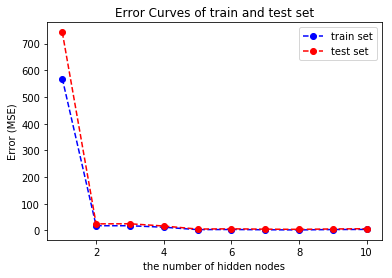

In [190]:
plt.title('Error Curves of train and test set')
n = np.arange(1,11,1)
plt.plot(n, train_error, 'bo--', label='train set')
plt.plot(n, test_error, 'ro--', label='test set')
plt.xlabel('the number of hidden nodes')
plt.ylabel('Error (MSE)')
plt.legend(loc='upper right')
plt.show()